In [1]:
import tensorflow as tf
from model import StarGAN
from utils.utils import *
from data_loader import DataLoader
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8

In [3]:
config = process_config("stargan_config.json")
sess = tf.Session()
data = DataLoader(sess, "./data/celebA/images/", "./data/celebA/list_attr_celeba.txt", 178, 128, 16, "train")
stargan = StarGAN(sess, config, data)
sess.run(tf.global_variables_initializer())

stargan_config.json
[1, 0, 0, 1, 0] ./data/celebA/images/044574.jpg
[1, 0, 0, 1, 1] ./data/celebA/images/000336.jpg
[0, 0, 0, 0, 1] ./data/celebA/images/077020.jpg
[0, 0, 1, 0, 1] ./data/celebA/images/011597.jpg
[1, 0, 0, 0, 1] ./data/celebA/images/148445.jpg


In [4]:
could_load, checkpoint_counter, checkpoint_epoch = stargan.load(stargan.model_dir)
if could_load:
    print("Successfully loaded checkpoint")
else:
    print("Failed to load checkpoint")
i = 0

Reading checkpoints...
INFO:tensorflow:Restoring parameters from ./checkpoints/stargan_checkpoint/default_16_128_128/StarGAN.model_02-2000
Successfully read StarGAN.model_02-2000
Successfully loaded checkpoint


In [12]:
i += 1
fake_im, real_im, fake_l, real_l = sess.run([stargan.fake_image, stargan.x, stargan.fake_labels, stargan.real_labels])
save_images(fake_im, image_manifold_size(fake_im.shape[0]),
            './demo_images/demo_{:02d}.png'.format(i))
save_images(real_im, image_manifold_size(real_im.shape[0]),
            './demo_images/demo_{:02d}_real.png'.format(i))
print("Real Labels:\n{}\nFake Labels:\n{}".format(str(real_l), str(fake_l)))

Real Labels:
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]]
Fake Labels:
[[1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1.]]


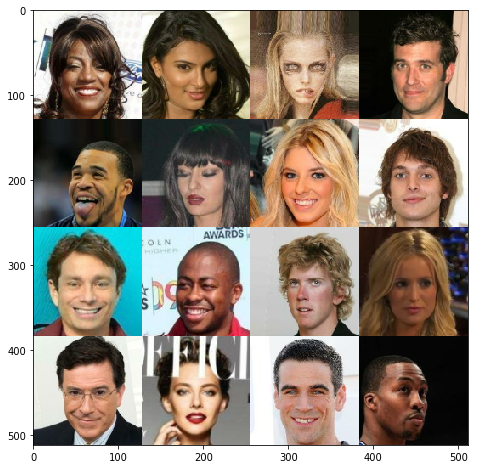

In [13]:
image = mpimg.imread('./demo_images/demo_{:02d}_real.png'.format(i))
plt.imshow(image)
plt.show()

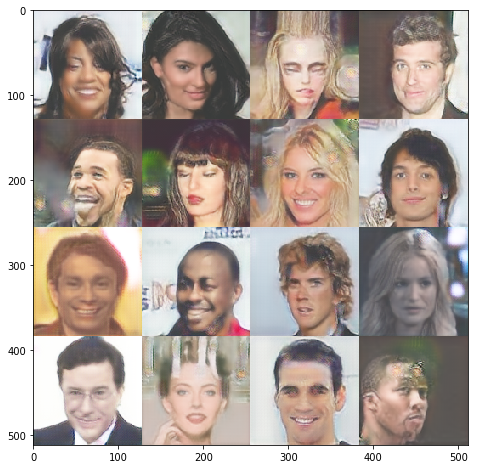

In [14]:
image = mpimg.imread('./demo_images/demo_{:02d}.png'.format(i))
plt.imshow(image)
plt.show()